# Ui-Wing Cheah
## Module 8 Code

In [2]:
# getting imports
import numpy as np 
import scipy.stats as sp 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline

### Problem 1
#### part (a) and (b)

Text(0.5, 1.0, 'Function g(x)')

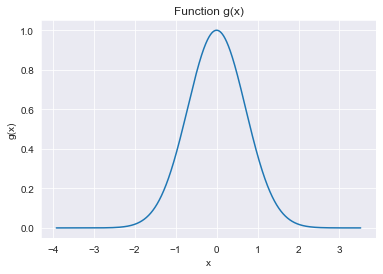

In [126]:
## run some supportcode for part (a) to see what kind of distribution results
nobs = 10000
sigma2 = 1
x_sp = np.linspace(0.01,0.99,100)
x_plot= sp.norm.pdf(sp.norm.ppf(x_sp,scale=sigma2),scale=sigma2,loc=0)
x_var = sp.norm.rvs(size=nobs,scale=sigma2,loc=0)
g_x = np.exp(-1*pow(x_var,2))

# let's plot f_x
ax_ = sns.lineplot(x=x_var,y=g_x)

ax_.set_xlabel('x')
ax_.set_ylabel('g(x)')
ax_.set_title('Function g(x)')


#### part (b)

In [5]:
sigmas= np.array([0.5,1,2,3,4])

f_bar = lambda sigmasq:1/np.sqrt(sigmasq*2+1)
def mc_int(sigma_,):
    nobs=10000
    x = sp.norm.rvs(size=nobs,scale=sigma_,loc=0)
    f_x = np.exp(-1*pow(x,2))
    f_x_barhat = np.mean(f_x)
    f_x_bar = f_bar(pow(sigma_,2))
    results = pd.Series({'analytical':f_x_bar,'empirical':f_x_barhat})
    return results

allResults = pd.DataFrame({sig_:mc_int(sig_) for sig_ in sigmas})




In [6]:
allResults

,0.5,1.0,2.0,3.0,4.0
analytical,0.816497,0.577350,0.333333,0.229416,0.174078
empirical,0.815855,0.578911,0.329550,0.229330,0.171365


In [8]:
print(allResults.to_latex())

\begin{tabular}{lrrrrr}
\toprule
{} &       0.5 &       1.0 &       2.0 &       3.0 &       4.0 \\
\midrule
analytical &  0.816497 &  0.577350 &  0.333333 &  0.229416 &  0.174078 \\
empirical  &  0.815855 &  0.578911 &  0.329550 &  0.229330 &  0.171365 \\
\bottomrule
\end{tabular}



### Problem 2

In [14]:
# given distribution
f_dist = lambda x: 3.852985*np.exp(-pow(x,2)*np.sqrt(x))*pow(np.sin(x),2)


Text(0.5, 1.0, 'Distributions')

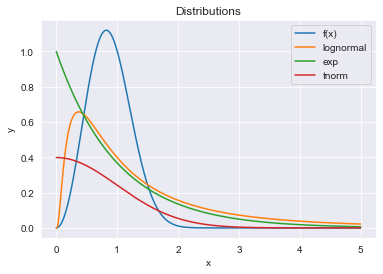

In [33]:
# plot f_dist
x_plot = np.linspace(0,5,500)
sns.set_style('darkgrid')
ax_ = sns.lineplot(x=x_plot,y=f_dist(x_plot),label='f(x)')
ax_ = sns.lineplot(x=x_plot,y=sp.lognorm.pdf(x_plot,loc=0,s=1),label='lognormal')
ax_ = sns.lineplot(x=x_plot,y=sp.expon.pdf(x_plot,),label='exp')
ax_ = sns.lineplot(x=x_plot,y=sp.norm.pdf(x_plot,loc=0,scale=1),label='tnorm')
ax_.set_xlabel('x')
ax_.set_ylabel('y')
ax_.set_title('Distributions')


In [ ]:
# Run Monte-Carlo simulation with a variety of distributions
nobs = 10000
# we will create a few different x's
# create a truncated normal distribution
def trunc_norm(loc=0,scale=1,ndraws=100):
    d_count= 0
    draws = np.zeros(ndraws,)
    while d_count<ndraws:
        var_ = sp.norm.rvs(size=1,loc=loc,scale=scale)
        if var_> 0:
            draws[d_count]=var_
            d_count+=1
    return draws

calc_var = lambda x: np.sum(pow(f_dist(x)-np.mean(f_dist(x)),2))/pow(len(x),2)


x_lognorm =sp.lognorm.rvs(size=nobs,scale=1.0,s=1)
x_exp = sp.expon.rvs(loc=0,scale=1.,size=nobs)
x_tnorm = trunc_norm(ndraws=nobs)
f_dist_bar = pd.Series({'lognorm':np.mean(f_dist(x_lognorm)),'exp':np.mean(f_dist(x_exp)),'tnorm':np.mean(f_dist(x_tnorm))})
f_dist_var = pd.Series({'lognorm':calc_var(f_dist(x_lognorm)),'exp':calc_var(f_dist(x_exp)),'tnorm':calc_var(f_dist(x_tnorm))})
results = pd.DataFrame({'mean':f_dist_bar,'var':f_dist_var})

In [15]:
results

,mean,var
lognorm,0.457404,0.000020
exp,0.442675,0.000020
tnorm,0.538934,0.000019


In [16]:
print(results.to_latex())

\begin{tabular}{lrr}
\toprule
{} &      mean &       var \\
\midrule
lognorm &  0.457404 &  0.000020 \\
exp     &  0.442675 &  0.000020 \\
tnorm   &  0.538934 &  0.000019 \\
\bottomrule
\end{tabular}



#### 3(b)

In [64]:
# Follow in the method of the text
# use a shifted exponential
# out of curiosity compare to a shifted log-normal

p_results = {}
e_shit = 3

for n in [1000,10000,100000]:
    # getting shifted/truncated exponential values
    y_exp = sp.expon.rvs(size=nsim)+e_shift
    y_logn = sp.lognorm.rvs(size=nsim,s=1)+e_shift
    # calculating the probability
    weit_exp = f_dist(y_exp)/sp.expon.pdf(y_exp-e_shift)
    prob_exp = np.mean(weit_exp)

    weit_logn = f_dist(y_logn)/sp.lognorm.pdf(y_logn-e_shift,s=1,)
    prob_logn = np.mean(weit_logn)
    p_results[n] = pd.Series({'exp':prob_exp,'logn':prob_logn})
p_results = pd.DataFrame(p_results)

In [65]:
p_results

,1000,10000,100000
exp,3.868048e-10,3.847561e-10,4.316975e-10
logn,1.675248e-10,2.058386e-10,8.935728e-11


In [66]:
print(p_results.to_latex())

\begin{tabular}{lrrr}
\toprule
{} &        1000   &        10000  &        100000 \\
\midrule
exp  &  3.868048e-10 &  3.847561e-10 &  4.316975e-10 \\
logn &  1.675248e-10 &  2.058386e-10 &  8.935728e-11 \\
\bottomrule
\end{tabular}



### Problem 4(b)

In [112]:
# for this problem we will draw values from a Pareto distribution
# We will a Monte-Carlo method to compute the 'empirical conditional mean for large enough K
# in scipy notation, b = alpha
# draw a Pareto
nobs = 100000
x_pareto = sp.pareto.rvs(b=2,size=nobs)

Text(0.5, 1.0, 'Pareto Distribution')

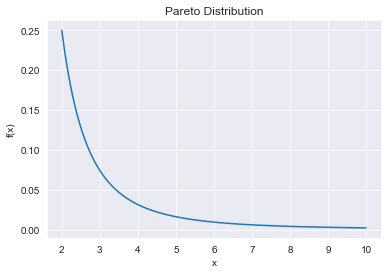

In [113]:
# plot the pareto distribution
x_plot = np.linspace(2,10,800)
y_pareto = sp.pareto.pdf(x_plot, b=2)
ax_ = sns.lineplot(x=x_plot,y=y_pareto)
sp.pareto.pdf(1,b=2)
ax_.set_xlabel('x')
ax_.set_ylabel('f(x)')
ax_.set_title('Pareto Distribution')


In [114]:
# Computing the conditional expectation
# for various levels of K

cond_exp = lambda alpha,k: alpha*k/(alpha-1)
emp_mean = pd.Series({K:np.mean(x_pareto[x_pareto>K]) for K in [5,6,7,8,9,10,15,20]})
analytical_mean= pd.Series({K:cond_exp(2,K) for K in [5,6,7,8,9,10,15,20]})
results = pd.DataFrame({'emp':emp_mean,'analytical':analytical_mean})

In [115]:
results

,emp,analytical
5,9.948393,10.0
6,12.030007,12.0
7,13.970223,14.0
8,15.873418,16.0
9,17.937019,18.0
10,19.701146,20.0
15,29.739930,30.0
20,39.050287,40.0


In [116]:
print(results.to_latex())

\begin{tabular}{lrr}
\toprule
{} &        emp &  analytical \\
\midrule
5  &   9.948393 &        10.0 \\
6  &  12.030007 &        12.0 \\
7  &  13.970223 &        14.0 \\
8  &  15.873418 &        16.0 \\
9  &  17.937019 &        18.0 \\
10 &  19.701146 &        20.0 \\
15 &  29.739930 &        30.0 \\
20 &  39.050287 &        40.0 \\
\bottomrule
\end{tabular}

